In [221]:
from astropy.io import fits
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

from scipy import cluster

import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()


In [3]:
cluster_stars = np.loadtxt('/Users/spardy/Research/table4.dat', usecols=(0, 1), dtype=('S', 'S'), unpack=True)

In [285]:
cluster_stars[1]

array(['M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92',
       'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92',
       'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92',
       'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92',
       'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92', 'M92',
       'M92', 'M92', 'M92', 'M15', 'M15', 'M15', 'M15', 'M15', 'M15',
       'M15', 'M15', 'M15', 'M15', 'M15', 'M53', 'M53', 'M53', 'M53',
       'M53', 'M53', 'M53', 'M53', 'M53', 'M53', 'M53', 'M53', 'M53',
       'M53', 'M53', 'M53', 'N5466', 'N5466', 'N5466', 'N5466', 'N5466',
       'N5466', 'N5466', 'N5466', 'N4147', 'N4147', 'N4147', 'M2', 'M2',
       'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2',
       'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M13', 'M13', 'M13', 'M13',
       'M13', 'M13', 'M13', 'M13', 'M13', 'M13', 'M13', 'M13', 'M13',
       'M13', 'M13', 'M13', 'M13', 'M13', 'M13', 'M13', 'M13', 'M13',
       'M1

In [288]:
cat = fits.open('/Users/spardy/Research/data/APOGEE/allStar-v603.fits')
names = np.array([name[5:].rstrip() for name in cat[1].data['TARGET_ID']])

In [34]:
#cat = fits.open('/Users/spardy/Research/data/APOGEE/allStar-v304.fits')
#names = np.array([name[5:] for name in cat[1].data['TARGET_ID']])

In [279]:
cat[1].data

rec.array([ ('apogee.apo1m.s.stars.1.VESTA                 ', '1.calibration.VESTA               ', 'apogee.apo1m.s.v603.1.VESTA                 ', 'apStar-r5-VESTA.fits              ', 'VESTA             ', 'apo1m   ', 1, 'calibration     ', -9999.9902, -9999.9902, -99.999001, -9999.9902, -9999.9902, -9999.9902, -99.999000549300007, -99.999000549300007, 292.21913090999999, -30.6029193637, 0, 4194304, 'APOGEE_1MTARGET                                                                                                     ', 2, 0, 434.85599, 0, '                                                                                                                                 ', 0, '                                                           ', 15.4655, 10.874, 0.0157554, 0.023306301, 15.798, 10.7027, 0.0107508, 0.0156168, 5000.0, 4.0, -0.5, 26.1143, 24.9105, 0.171278, array([-1., -1.], dtype=float32), array([-1., -1.], dtype=float32), array([-1., -1.], dtype=float32), array([-1., -1.], dtype=flo

In [309]:
cluststars = [name for name in cluster_stars[0][cluster_stars[1] == 'M67']]

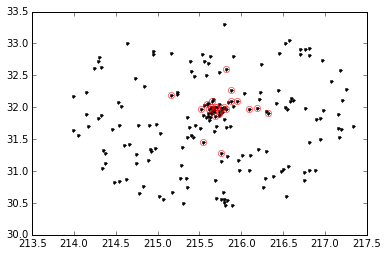

In [311]:
ind = []
labels_true = np.zeros(len(within_box[0]))-1

for i, cluststar in enumerate(cluststars): 
    _ind = np.where(names == cluststar)[0][0]
    if (cat[1].data['FE_H'][_ind] > -9999) and (cat[1].data['C_H'][_ind] > -9999):
        ind.append(_ind)
        _ = np.where(names[within_box] == cluststar)[0]
        labels_true[_] = 1


avg_glon = np.mean(cat[1].data['GLON'][ind])
avg_glat = np.mean(cat[1].data['GLAT'][ind])

within_box = np.where((np.abs(cat[1].data['GLON'] - avg_glon) < 2)*
                      (np.abs(cat[1].data['GLAT'] - avg_glat) < 2)*
                      (cat[1].data['FE_H'] > -9999)*(cat[1].data['C_H'] > -9999))
plt.plot(cat[1].data['GLON'][within_box],
         cat[1].data['GLAT'][within_box], 'k.', zorder=-1)

  
plt.plot(cat[1].data['GLON'][ind], cat[1].data['GLAT'][ind], 'o', markerfacecolor='none', markeredgecolor='r')
    

(-2, 2)

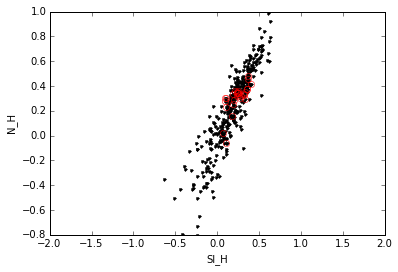

In [308]:
plt.plot(cat[1].data['SI_H'][within_box],
         cat[1].data['N_H'][within_box], 'k.', zorder=-1)

plt.plot(cat[1].data['SI_H'][ind],
         cat[1].data['N_H'][ind], 'o', markerfacecolor='none', markeredgecolor='r')
plt.ylabel('N_H')
plt.xlabel('SI_H')
plt.xlim([-2, 2])


(-100, 100)

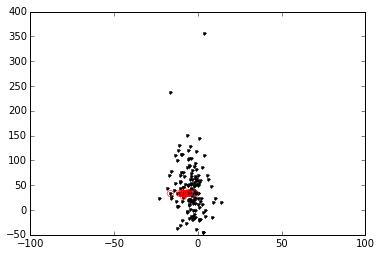

In [284]:
plt.plot(cat[1].data['PMRA'][within_box],
         cat[1].data['VHELIO_AVG'][within_box], 'k.', zorder=-1)

plt.plot(cat[1].data['PMRA'][ind],
         cat[1].data['VHELIO_AVG'][ind], 'o', markerfacecolor='none', markeredgecolor='r')

plt.xlim([-100, 100])
#plt.ylim([-100, 100])

In [195]:
print np.std(cat[1].data['FE_H'][ind])
print np.std(cat[1].data['C_H'][ind])

0.0498869
0.0725982


In [196]:
X = np.vstack((cat[1].data['FE_H'][within_box], cat[1].data['C_H'][within_box])).T

In [272]:
def DBSCAN_plot(axis, data, eps, min_samples, labels_true):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    ##############################################################################
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        if k == -1:
            # Black used for noise.
            col = 'k'
            xy = X[class_member_mask]
            #print np.std(xy, axis=1)
            axis.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=col,
                     markeredgecolor='k', markersize=6, zorder=-1)
        else:
            print np.std(X[class_member_mask], axis=0)
            xy = X[class_member_mask & core_samples_mask]
            axis.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=col,
                     markeredgecolor='k', markersize=10)

            xy = X[class_member_mask & ~core_samples_mask]
            axis.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=col,
                     markeredgecolor='k', markersize=10)


    axis.plot(cat[1].data['FE_H'][ind],
             cat[1].data['C_H'][ind], '+',
             markerfacecolor='blue', markeredgecolor='blue')

    axis.set_title('eps=%3.2f\nEstimated number of clusters: %d' % (eps, n_clusters_))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


[ 0.04365602  0.05007645]
Estimated number of clusters: 1
Homogeneity: 0.233
Completeness: 0.152
V-measure: 0.184
Adjusted Rand Index: 0.285
Adjusted Mutual Information: 0.148
Silhouette Coefficient: 0.090


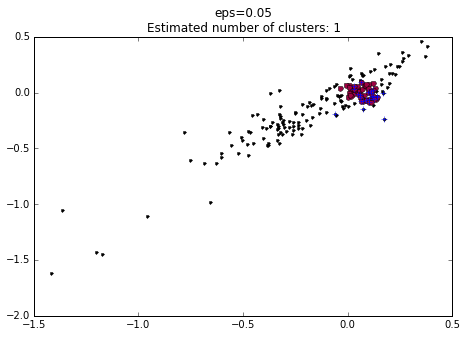

In [276]:
fig, axis = plt.subplots(figsize=(7.5, 5))
#axes = axes.flatten()
#for axis, eps in zip(axes, [0.01, 0.02, 0.03, 0.04]):
DBSCAN_plot(axis, X, 0.05, 15, labels_true)

## Ward

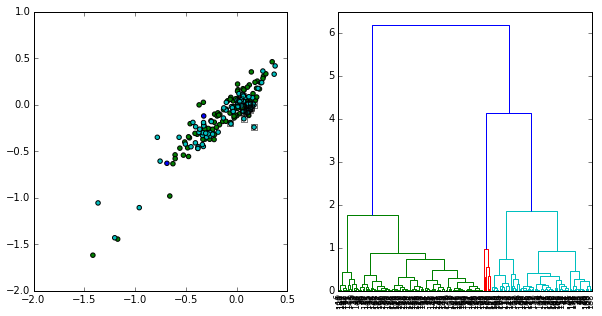

In [269]:
Z = cluster.hierarchy.ward(X)
max_d = 2
clusters = cluster.hierarchy.fcluster(Z, max_d, criterion='distance')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
dendro = cluster.hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    #no_plot=True,
    ax=axes[1],
    color_threshold = max_d
)
axes[0].scatter(X[:,0], X[:,1], c=dendro['color_list'])  # plot points with cluster dependent colors
axes[0].plot(cat[1].data['FE_H'][ind],
         cat[1].data['C_H'][ind], 's',
         markerfacecolor='none', markeredgecolor='black')


## Median

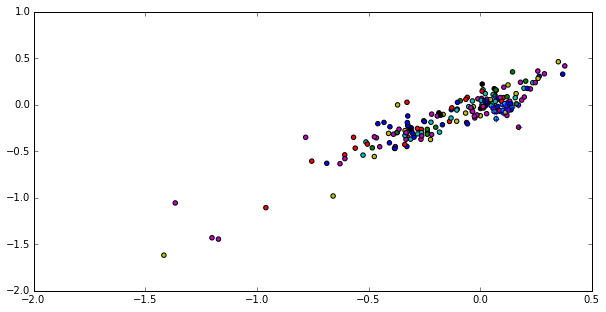

In [232]:
Z = cluster.hierarchy.median(X)
max_d = 0.1
clusters = cluster.hierarchy.fcluster(Z, max_d, criterion='distance')
fig, axis = plt.subplots(figsize=(10, 5))
dendro = cluster.hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold = max_d,
    no_plot=True
)
axis.scatter(X[:,0], X[:,1], c=dendro['color_list'])  # plot points with cluster dependent colors
axis.plot(cat[1].data['FE_H'][ind],
         cat[1].data['C_H'][ind], '+',
         markerfacecolor='blue', markeredgecolor='blue')


## Complete 

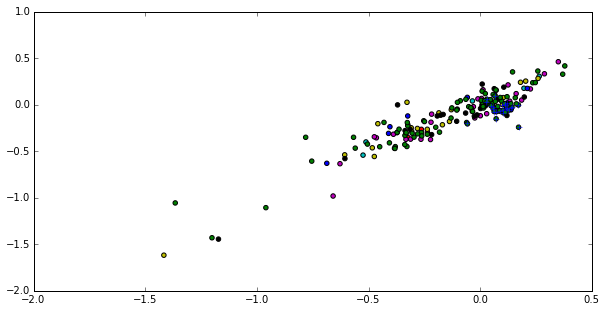

In [233]:
Z = cluster.hierarchy.complete(X)
max_d = 0.5
clusters = cluster.hierarchy.fcluster(Z, max_d, criterion='distance')
fig, axis = plt.subplots(figsize=(10, 5))
dendro = cluster.hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    no_plot=True,
    color_threshold = max_d
)
axis.scatter(X[:,0], X[:,1], c=dendro['color_list'])  # plot points with cluster dependent colors
axis.plot(cat[1].data['FE_H'][ind],
         cat[1].data['C_H'][ind], '+',
         markerfacecolor='blue', markeredgecolor='blue')


417